In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 选择图片
# 0618 0854 1066
data_name = '1066'

In [3]:
# 数据暂存
features = []
labels = []

In [4]:
# 用于决定采集的数据标签
is_positive = False

In [5]:
# 鼠标回调函数
def on_mouse(event, x, y, flags, param):
    global features, labels, is_positive

    if event == cv2.EVENT_LBUTTONDOWN:
        color = img[y, x] # 虽然是img[y, x], 但是返回的是BGR三个通道的数值

        # 根据标签决定是正样本还是负样本，标签在主函数中根据键入来更改
        if is_positive:
            labels.append(1)
        else:
            labels.append(0)

        features.append(color)
        print(f'Collected color: {color} at position: {(x, y)} with label: {labels[-1]}')

In [6]:
# 开启新窗口
cv2.namedWindow('image')
cv2.setMouseCallback("image", on_mouse)
# 加载图片
img_path = f'./input_data/{data_name}.png'
img = cv2.imread(img_path)
img_name = os.path.splitext(os.path.basename(img_path))[0]

while True:
    cv2.imshow('image', img)

    key = cv2.waitKey(1) & 0xFF

    if key == ord('y'):
        print(f"Collecting positive samples. Press 'n' to switch, 'Esc' to stop.")
        is_positive = True
    elif key == ord('n'):
        print(f"Collecting negative samples. Press 'y' to switch, 'Esc' to stop.")
        is_positive = False
    elif key == 27:
        print("Stopping data collection.")
        break
# 关闭窗口
cv2.destroyAllWindows()

Collected color: [255 255 255] at position: (235, 86) with label: 0
Collected color: [255 255 253] at position: (246, 86) with label: 0
Collected color: [255 255 254] at position: (267, 84) with label: 0
Collected color: [255 255 255] at position: (266, 77) with label: 0
Collected color: [255 255 255] at position: (225, 71) with label: 0
Collected color: [255 255 255] at position: (248, 67) with label: 0
Collected color: [255 255 255] at position: (263, 65) with label: 0
Collected color: [255 255 255] at position: (287, 62) with label: 0
Collected color: [255 255 255] at position: (299, 51) with label: 0
Collected color: [255 255 255] at position: (241, 50) with label: 0
Collected color: [255 255 255] at position: (200, 43) with label: 0
Collected color: [255 255 255] at position: (214, 36) with label: 0
Collected color: [255 255 255] at position: (257, 35) with label: 0
Collected color: [255 255 255] at position: (290, 35) with label: 0
Collected color: [255 255 255] at position: (315

In [7]:
# 转为numpy数组处理
features = np.array(features)
labels = np.array(labels)

In [8]:
# 数据保存到 CSV 文件的函数
def save_to_csv(features, labels, filename):
    # 检查文件是否存在
    if os.path.exists(filename):
        # 读取现有的 CSV 文件
        existing_data = pd.read_csv(filename)
        # 将新数据转换为 DataFrame
        new_data = pd.DataFrame({
            'B': features[:, 0],
            'G': features[:, 1],
            'R': features[:, 2],
            'Label': labels
        })
        # 合并数据
        combined_data = pd.concat([existing_data, new_data], ignore_index=True)
        # 保存合并后的数据
        combined_data.to_csv(filename, index=False)
    else:
        # 如果文件不存在，直接保存新数据
        new_data = pd.DataFrame({
            'B': features[:, 0],
            'G': features[:, 1],
            'R': features[:, 2],
            'Label': labels
        })
        new_data.to_csv(filename, index=False)

# 采集完数据后，调用 save_to_csv 函数保存数据
csv_filename = f'././RGB_data/data_{img_name}.csv'
save_to_csv(features, labels, csv_filename)

print(f'Data has been saved to {csv_filename}')

Data has been saved to ././RGB_data/data_1066.csv


绘制R-G图

In [9]:
# 绘制R-G图
def Plot_BGR(features):
    # 分离正负样本
    positive_features = features[labels == 1]
    negative_features = features[labels == 0]
    
    # opencv 默认提取通道是BGR -> B(0), G(1) R(2)
    positive_R = positive_features[:, 2]
    positive_G = positive_features[:, 1]
    
    negative_R = negative_features[:, 2]
    negative_G = negative_features[:, 1]
    
    plt.scatter(positive_R, positive_G, color='red', label='Positive Samples')
    plt.scatter(negative_R, negative_G, color='blue', label='Negative Samples')
    
    plt.title(f'R-G channel Plot of {img_name}')
    plt.xlabel('R Channel')
    plt.ylabel('G Channel')
    plt.legend()
    plt.savefig(f'./RG_png/{img_name}_RG.png')
    plt.show()


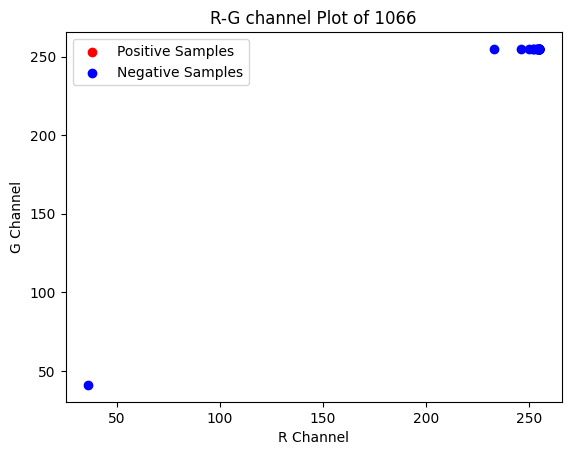

In [10]:
# 未标准化训练集R-G图像
Plot_BGR(features)